[for reference](https://youtu.be/i_LwzRVP7bg?si=W15w4lm90PJ2H15u)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #standardizes features by removing the mean and scaling to unit variance.
from imblearn.over_sampling import RandomOverSampler  # helps balance imbalanced datasets by randomly duplicating samples from the minority class(es) until all classes have the same number of samples.
%matplotlib inline


# Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [magic data set](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope). Irvine, CA: University of California, School of information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [41]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv(r"E:\COADING\DataSet\magic+gamma+telescope\magic04.data", names=cols)
df["class"] = (df["class"] == 'g').astype(int)


df.head()



<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\91991\AppData\Local\Temp\ipykernel_4604\1228920310.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("E:\COADING\DataSet\magic+gamma+telescope\magic04.data", names=cols)


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

# **Train, validate and test dataset**

In [3]:
# train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])


# Split into train and temporary sets (80% train, 20% temporary)
train, temp = train_test_split(df, test_size=0.2, random_state=42)

# Now split the temporary set into validation and test sets (50% validation, 50% test of temp)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

In [4]:
print(train.shape)
print(valid.shape)
print(test.shape)


(15216, 11)
(1902, 11)
(1902, 11)


In [5]:
def scale_dataset(dataframe, oversample = False):
    # X = dataframe[dataframe.columns[:-1]].values
    # y = dataframe[dataframe.columns[-1]].values

    if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values  # All rows, all columns except the last one
        y = dataframe.iloc[:, -1].values   # All rows, only the last column
    else:
        # If dataframe is already a NumPy array
        X = dataframe[:, :-1]
        y = dataframe[:, -1]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)    #The transformed features will be on the same scale, which is important for many ML algorithms.

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)    #The data after this operation will have an equal number of samples for each class.

    data = np.hstack((X, np.reshape(y, (-1, 1))))   #This line horizontally stacks (concatenates) your feature matrix X with the reshaped target array y.

    return data, X, y

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [7]:
train

array([[-0.54294179, -0.62738866, -0.64590104, ...,  1.47665244,
        -0.8437807 ,  1.        ],
       [-0.66573322, -0.50919261, -0.80101361, ..., -0.04132548,
        -0.51586452,  1.        ],
       [-0.69143496, -0.34756347, -0.53141822, ...,  0.12281918,
        -0.82694425,  1.        ],
       ...,
       [-0.83204972, -0.94854728, -1.10764133, ..., -0.2082368 ,
        -1.82377413,  0.        ],
       [-0.52150791, -0.32025702, -0.67129464, ...,  1.84580933,
        -0.09506038,  0.        ],
       [ 0.79349432, -0.22477237,  0.83750843, ...,  2.29345569,
         0.37315059,  0.        ]])

In [8]:
X_train

array([[-0.54294179, -0.62738866, -0.64590104, ..., -0.21610391,
         1.47665244, -0.8437807 ],
       [-0.66573322, -0.50919261, -0.80101361, ..., -0.36543949,
        -0.04132548, -0.51586452],
       [-0.69143496, -0.34756347, -0.53141822, ...,  0.2093676 ,
         0.12281918, -0.82694425],
       ...,
       [-0.83204972, -0.94854728, -1.10764133, ...,  0.0661701 ,
        -0.2082368 , -1.82377413],
       [-0.52150791, -0.32025702, -0.67129464, ...,  0.47210305,
         1.84580933, -0.09506038],
       [ 0.79349432, -0.22477237,  0.83750843, ..., -0.24138967,
         2.29345569,  0.37315059]])

In [9]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

# *Classification Models*

## *kNN*

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       578
           1       0.90      0.83      0.87      1324

    accuracy                           0.82      1902
   macro avg       0.79      0.81      0.80      1902
weighted avg       0.83      0.82      0.82      1902



## *Naive Bayse*

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       675
           1       0.73      0.90      0.81      1227

    accuracy                           0.72      1902
   macro avg       0.71      0.65      0.65      1902
weighted avg       0.71      0.72      0.70      1902



## *Logostic regression*

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       675
           1       0.85      0.82      0.84      1227

    accuracy                           0.79      1902
   macro avg       0.77      0.78      0.77      1902
weighted avg       0.79      0.79      0.79      1902



## *Support-Vector Machinces*

In [22]:
from sklearn.svm import SVC

In [23]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [24]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       675
           1       0.89      0.90      0.90      1227

    accuracy                           0.87      1902
   macro avg       0.86      0.85      0.85      1902
weighted avg       0.87      0.87      0.87      1902



## *Nural Network*

In [25]:
import tensorflow as tf

In [26]:
# def plot_loss(history):
#     plt.plot(history.history['loss'], label = 'loss')
#     plt.plot(history.history['val_loss'], label = 'val_loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Binary crossentropy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# def plot_accuracy(history):
#     plt.plot(history.history['accuracy'], label = 'accuracy')
#     plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [27]:
# nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
#     tf.keras.layers.Dense(32, activation = 'relu'),
#     tf.keras.layers.Dense(1, activation = 'sigmoid')    
# ])

# nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# history = nn_model.fit(X_train, y_train, epochs = 100, batch_size = 100, validation_split = 0.2, verbose = 0)

# plot_loss(history)
# plot_accuracy(history)

In [28]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [29]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')    
    ])
    
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

    return nn_model, history

16 nodes, dropout 0, learning rate 0.01, batch size 32


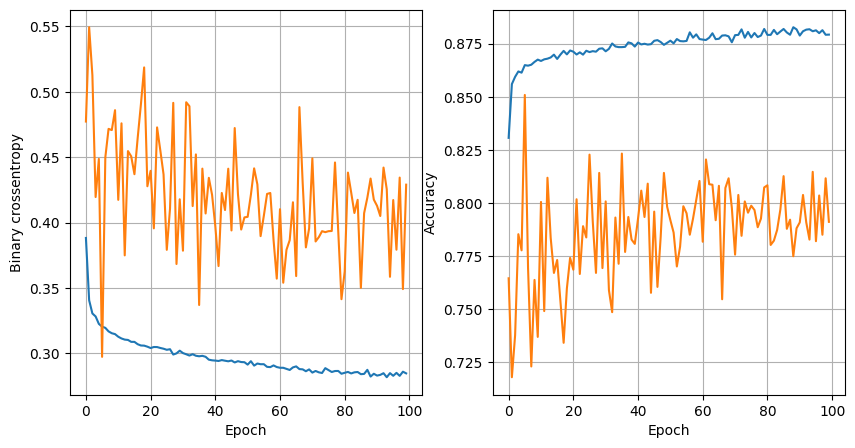

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8732 - loss: 0.3026 
16 nodes, dropout 0, learning rate 0.01, batch size 64


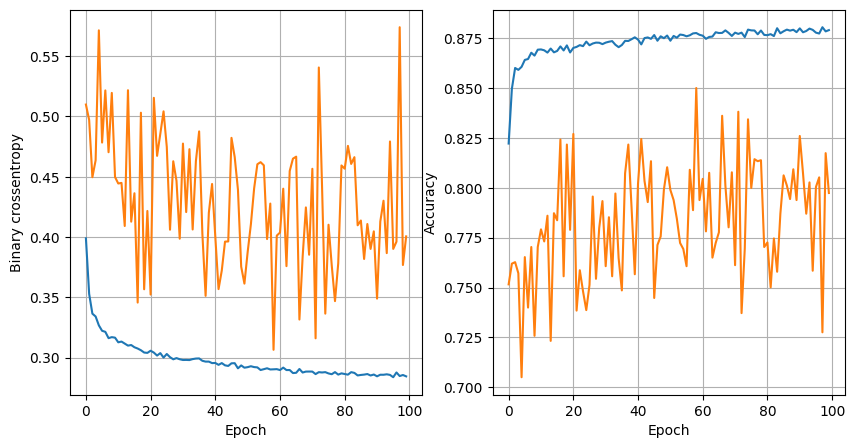

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3095 
16 nodes, dropout 0, learning rate 0.01, batch size 128


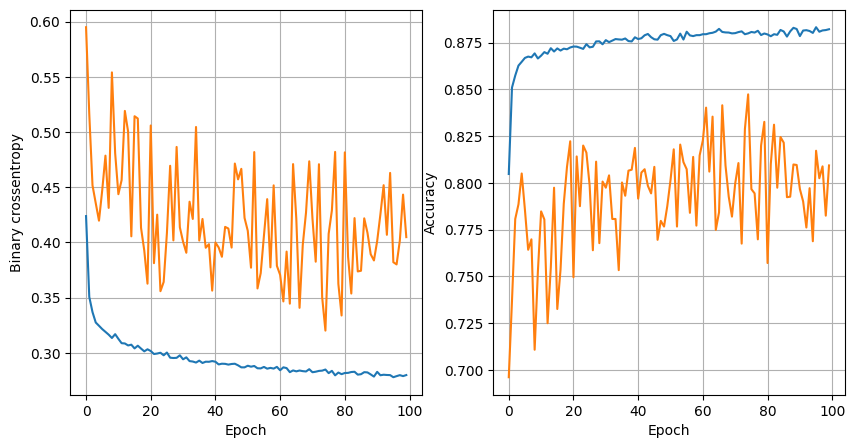

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3044 
16 nodes, dropout 0, learning rate 0.005, batch size 32


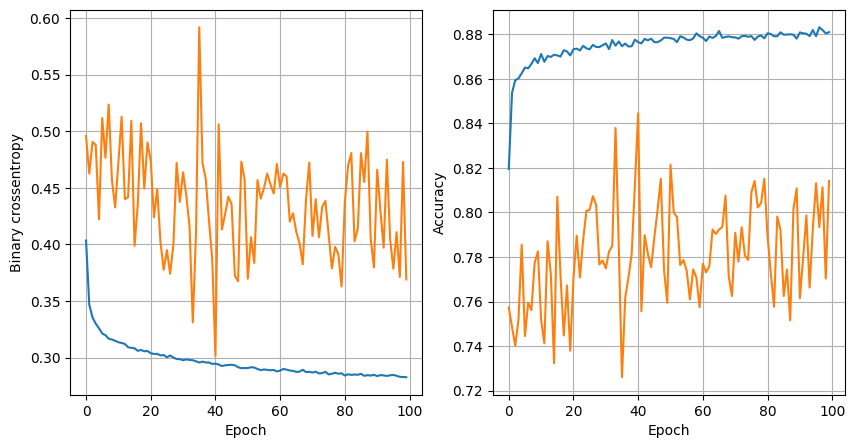

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8694 - loss: 0.3215 
16 nodes, dropout 0, learning rate 0.005, batch size 64


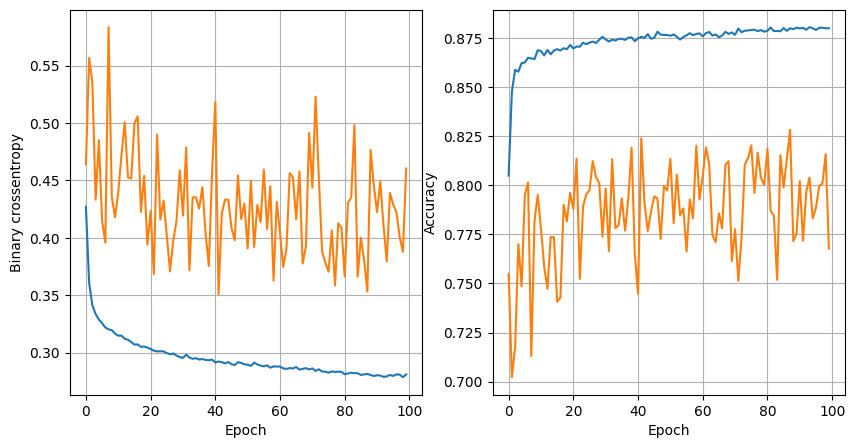

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3048 
16 nodes, dropout 0, learning rate 0.005, batch size 128


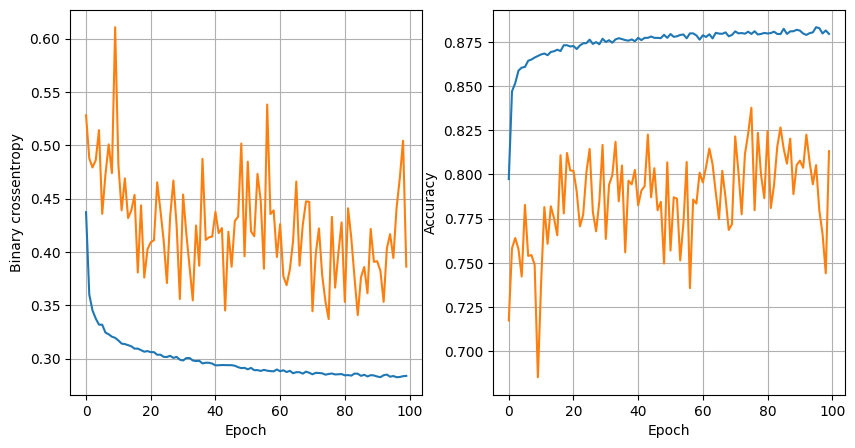

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.2950 
16 nodes, dropout 0, learning rate 0.001, batch size 32


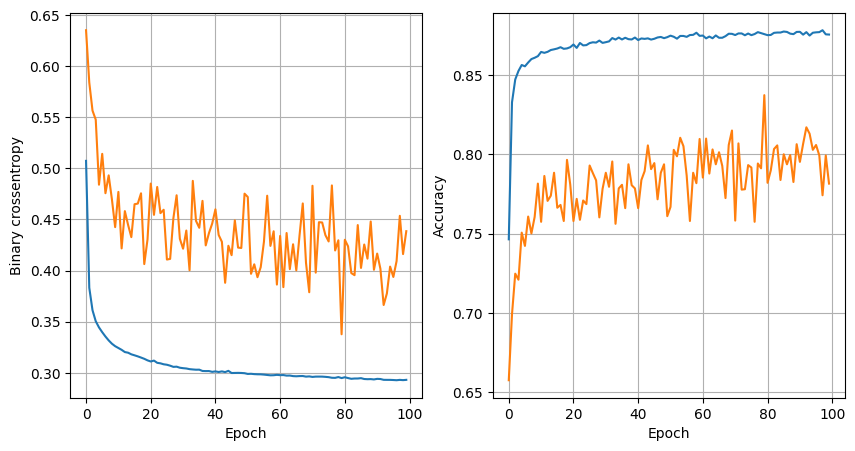

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3161 
16 nodes, dropout 0, learning rate 0.001, batch size 64


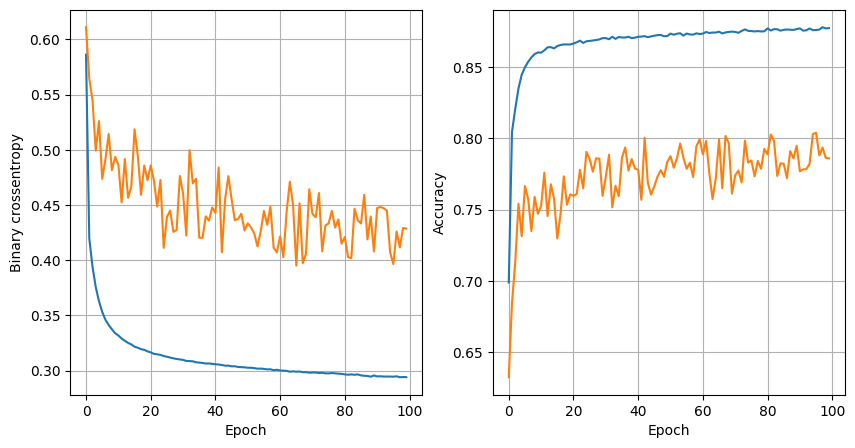

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.2939 
16 nodes, dropout 0, learning rate 0.001, batch size 128


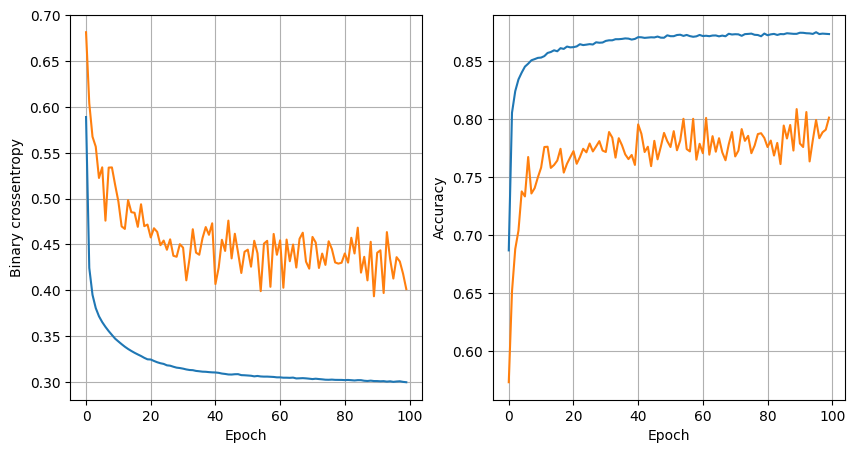

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3037 
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


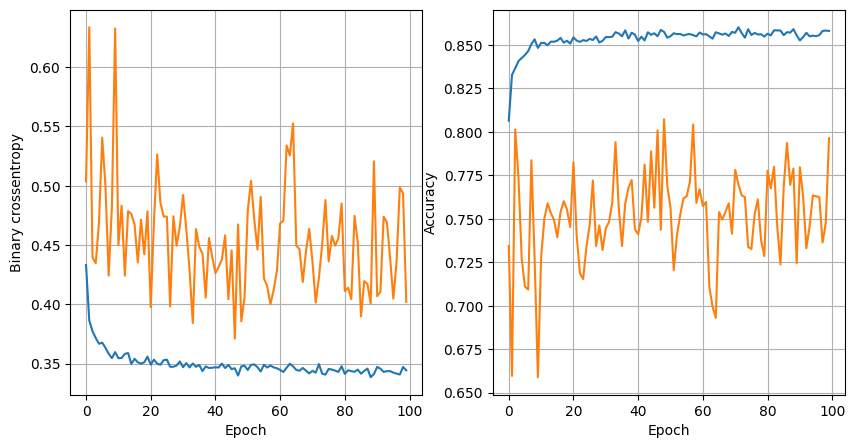

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8681 - loss: 0.3121 
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


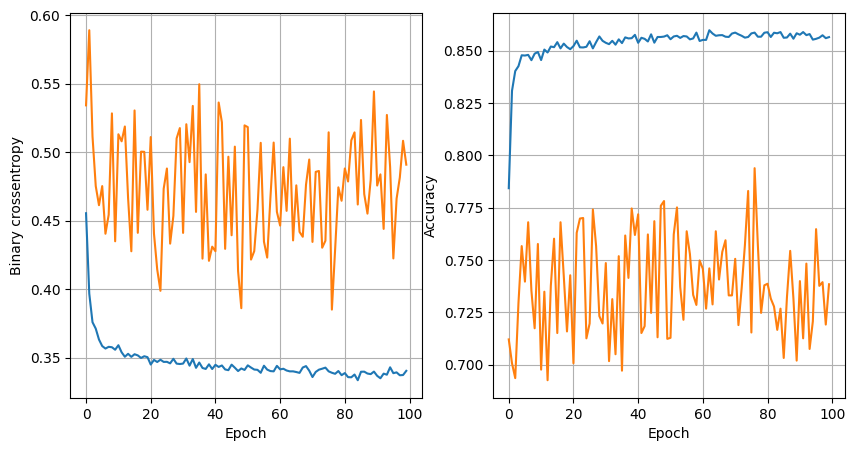

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3050 
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


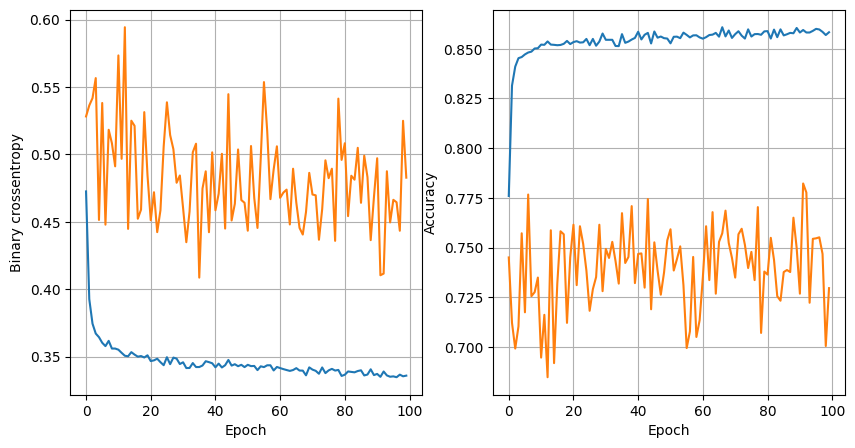

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3153 
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


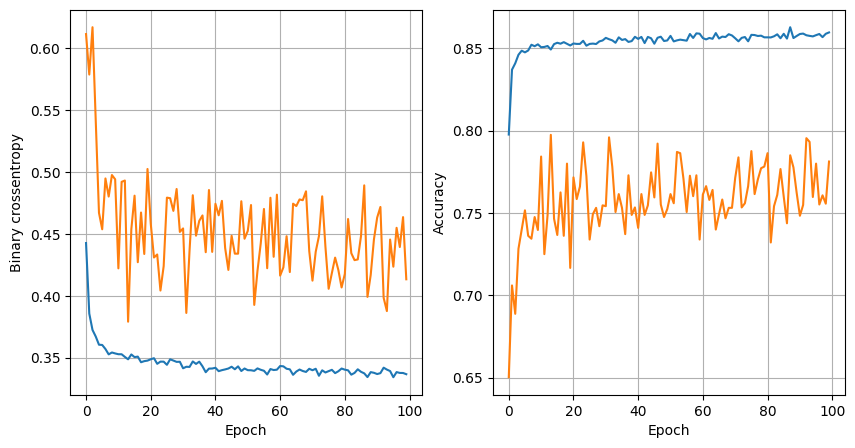

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3154 
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


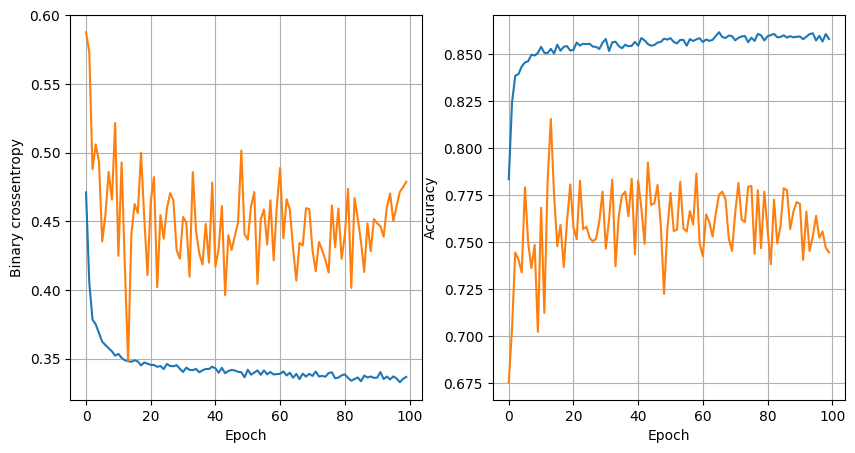

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3111 
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


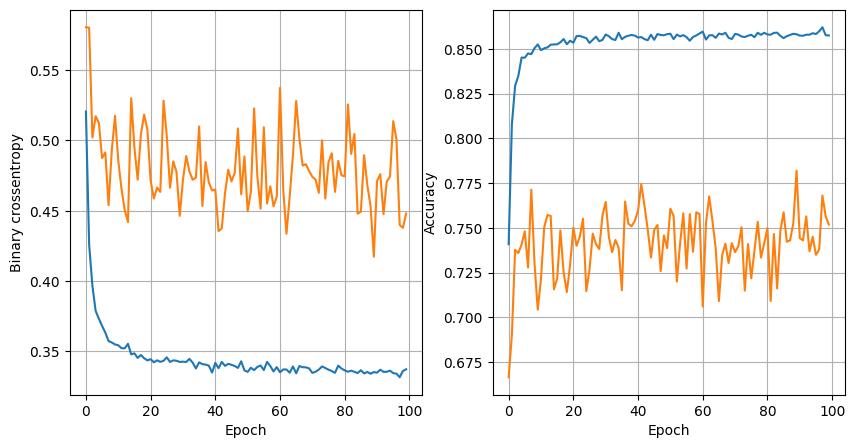

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.3096 
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


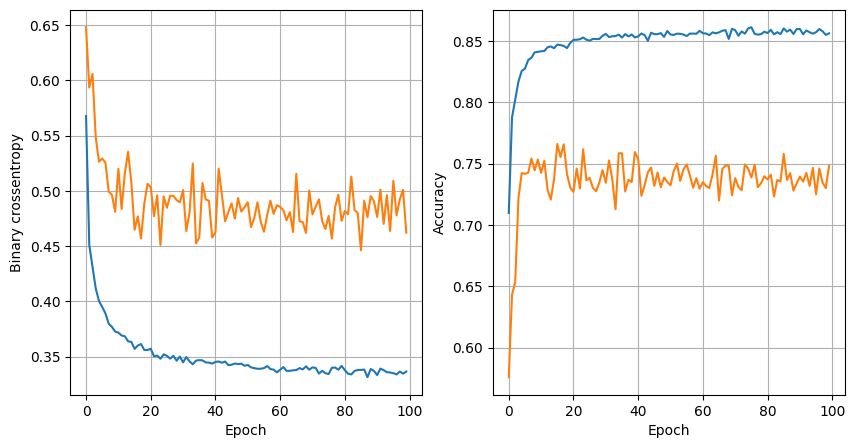

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3082 
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


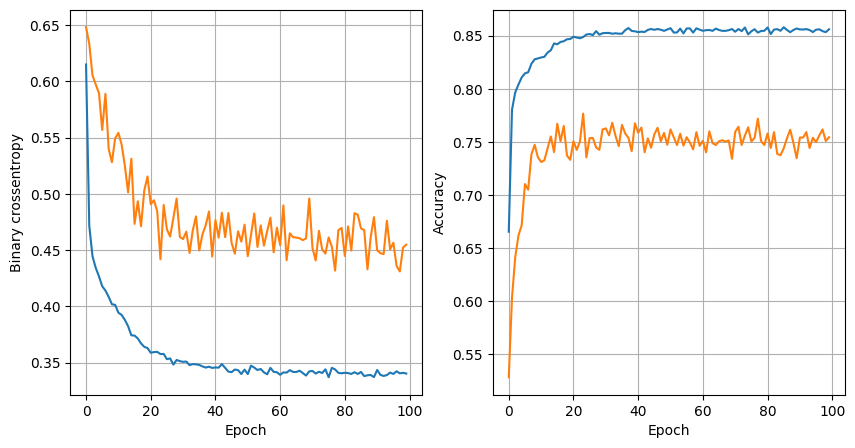

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3141 
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


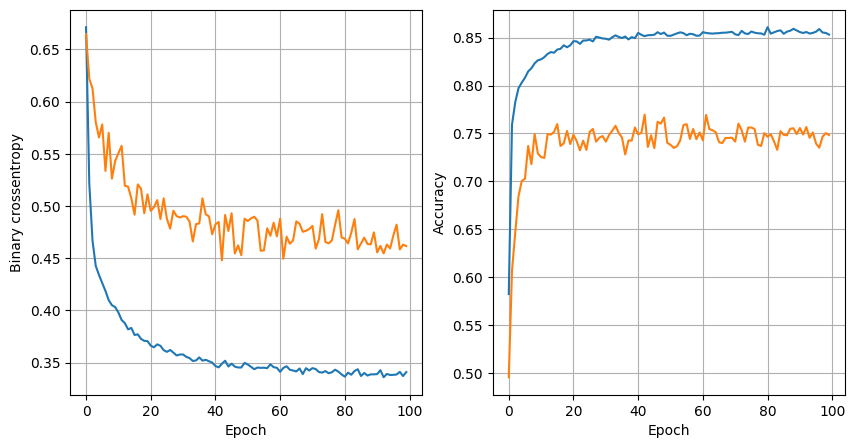

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3157 
32 nodes, dropout 0, learning rate 0.01, batch size 32


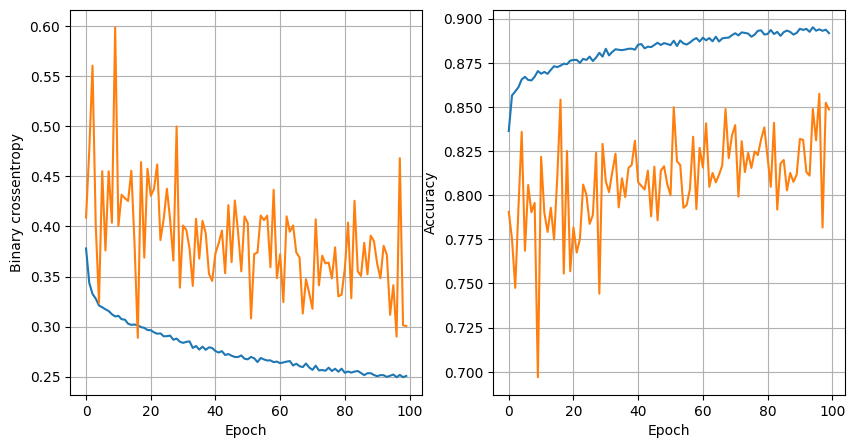

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3387 
32 nodes, dropout 0, learning rate 0.01, batch size 64


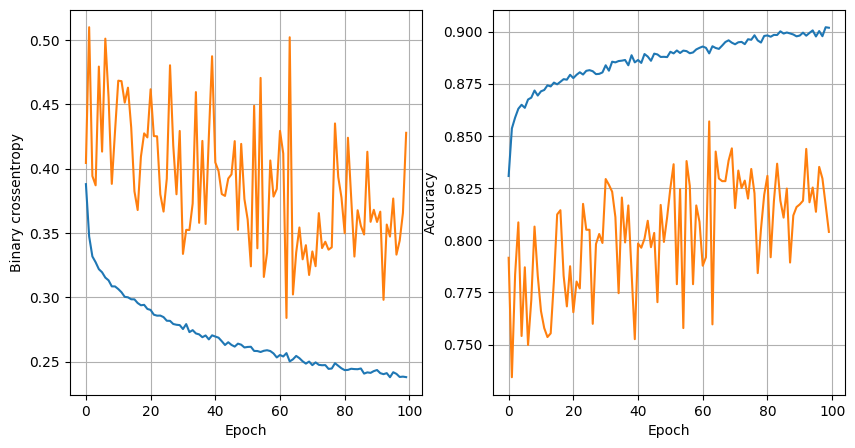

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3593 
32 nodes, dropout 0, learning rate 0.01, batch size 128


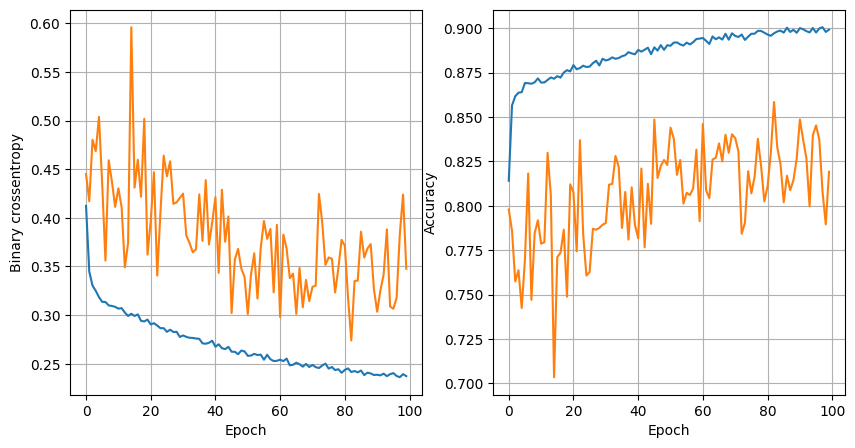

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3623 
32 nodes, dropout 0, learning rate 0.005, batch size 32


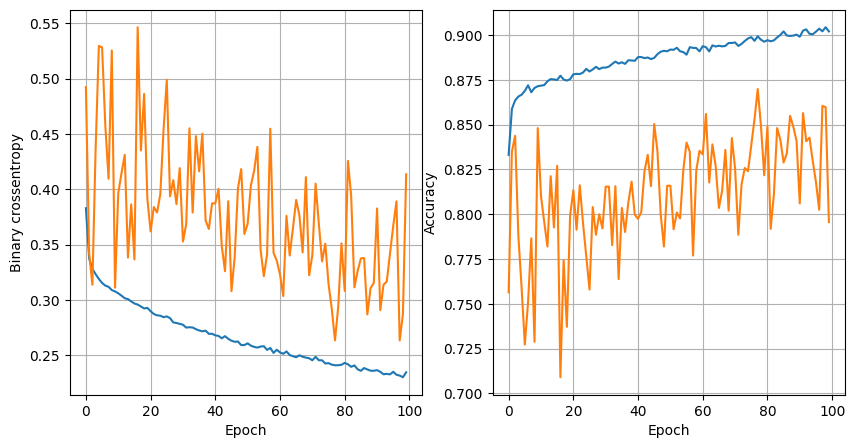

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.3698 
32 nodes, dropout 0, learning rate 0.005, batch size 64


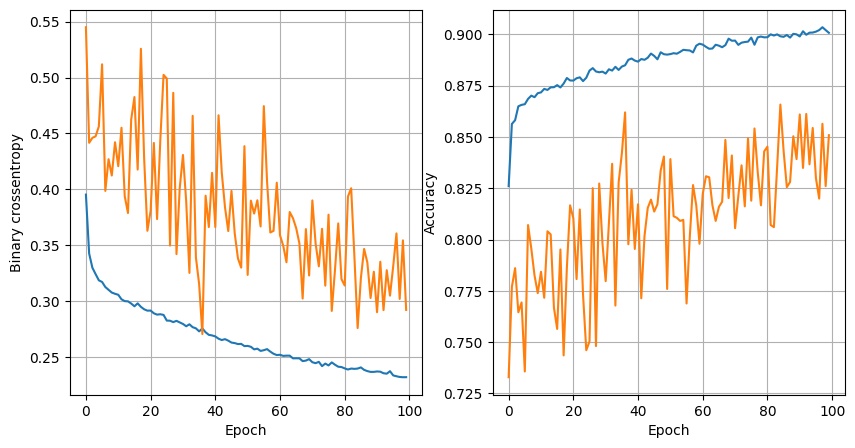

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8704 - loss: 0.3430 
32 nodes, dropout 0, learning rate 0.005, batch size 128


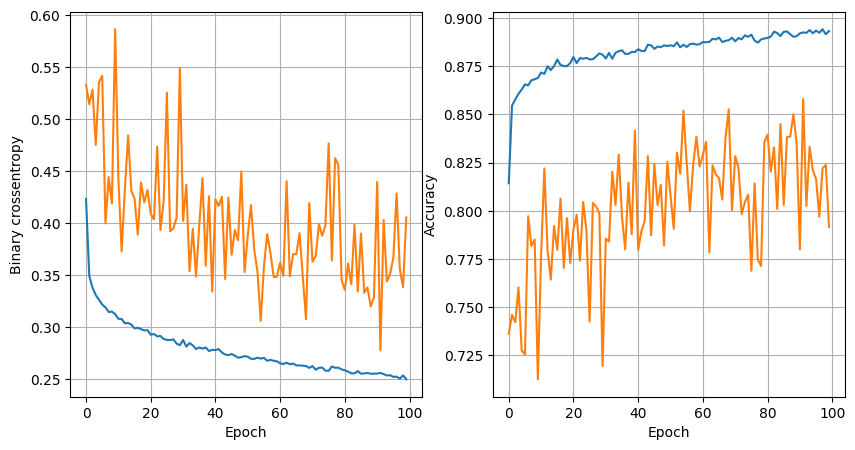

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8732 - loss: 0.3412 
32 nodes, dropout 0, learning rate 0.001, batch size 32


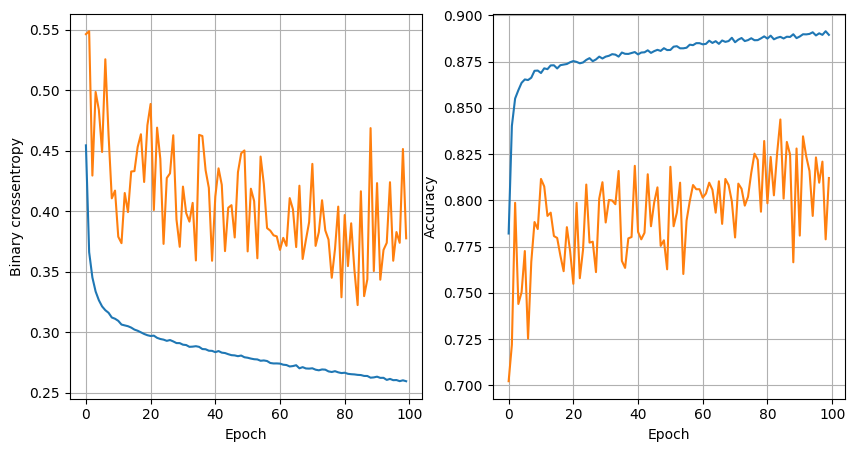

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8754 - loss: 0.3141  
32 nodes, dropout 0, learning rate 0.001, batch size 64


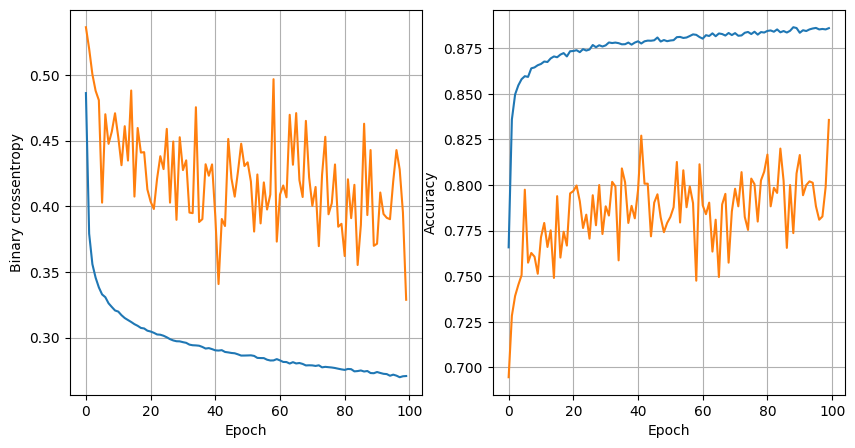

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3087 
32 nodes, dropout 0, learning rate 0.001, batch size 128


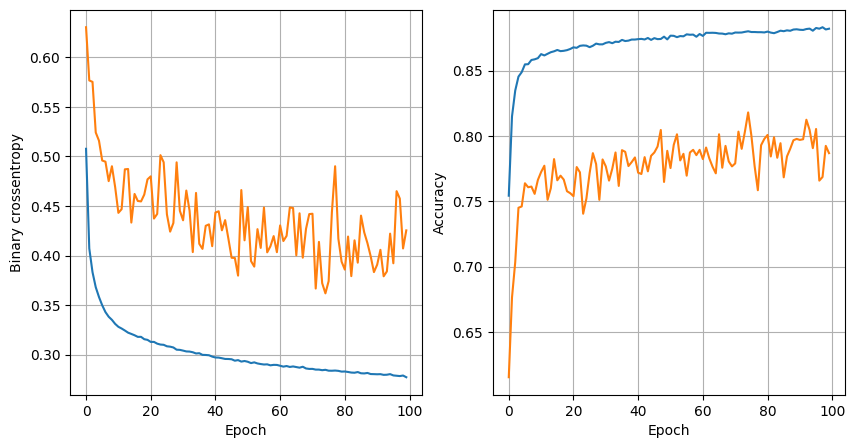

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8647 - loss: 0.3113 
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


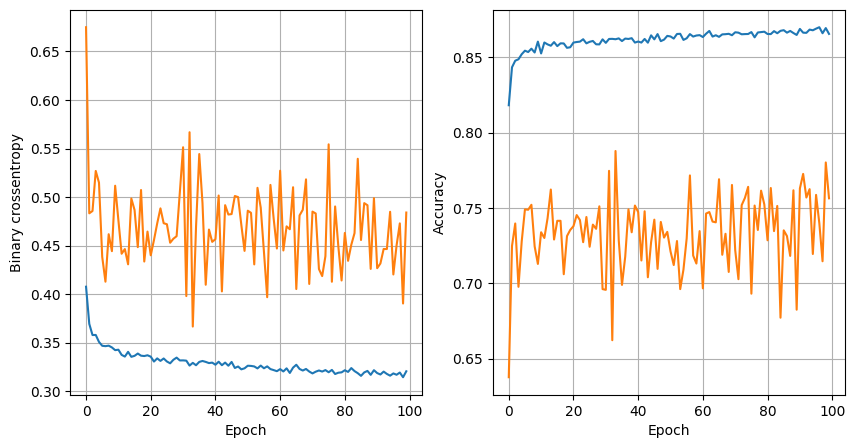

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8745 - loss: 0.3067 
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


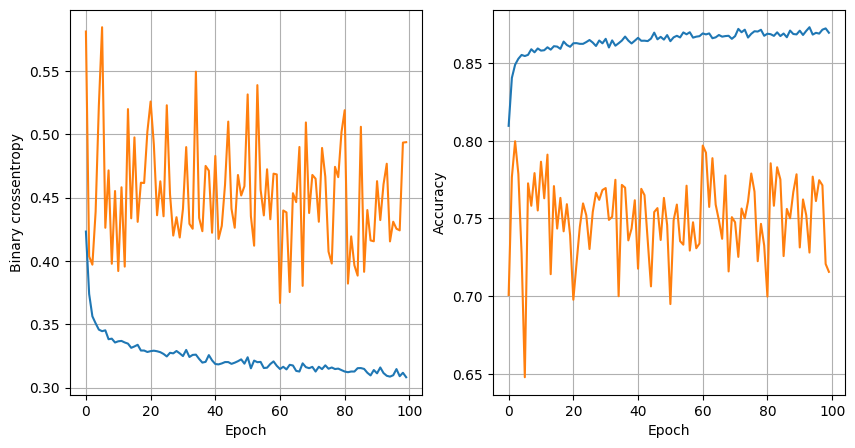

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8844 - loss: 0.2932 
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


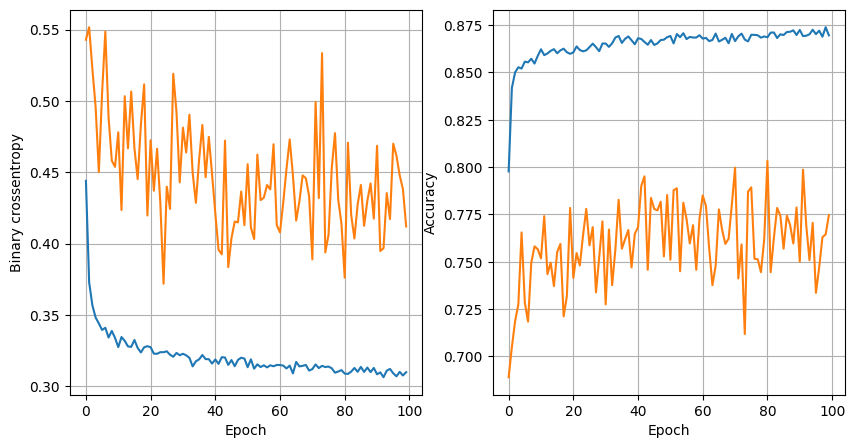

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.2971 
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


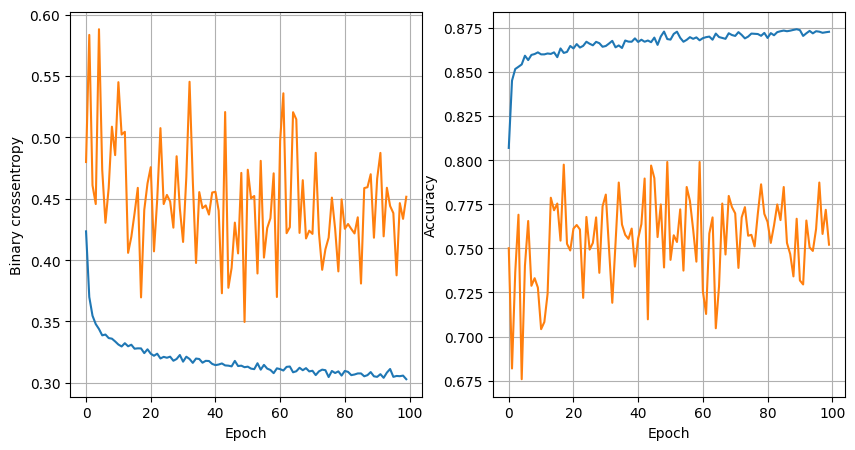

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8749 - loss: 0.2904 
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


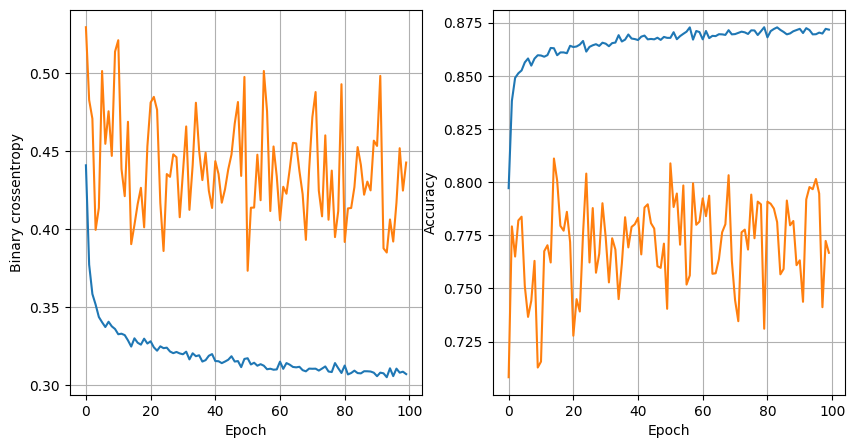

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8811 - loss: 0.3006 
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


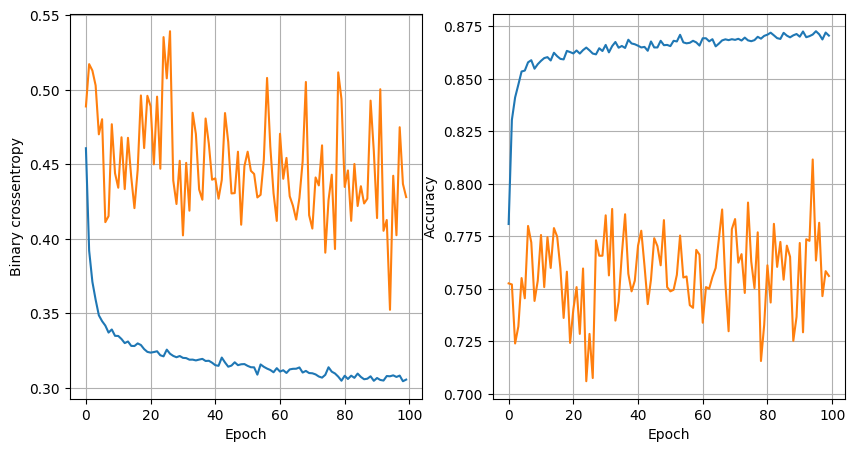

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8838 - loss: 0.2935 
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


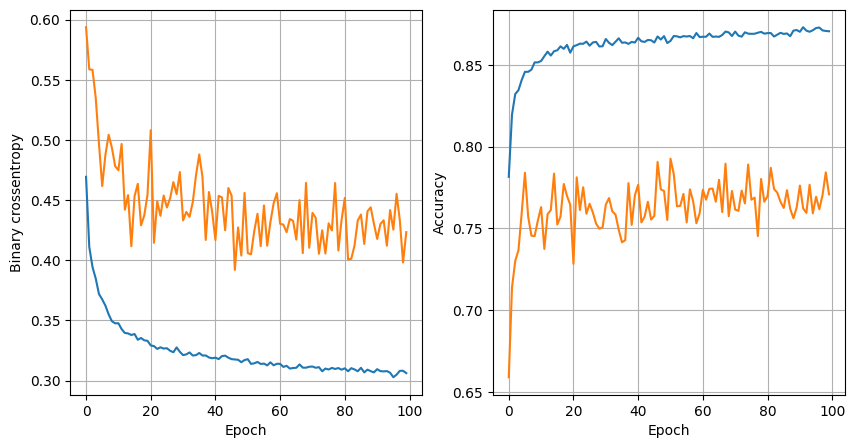

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8747 - loss: 0.2979 
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


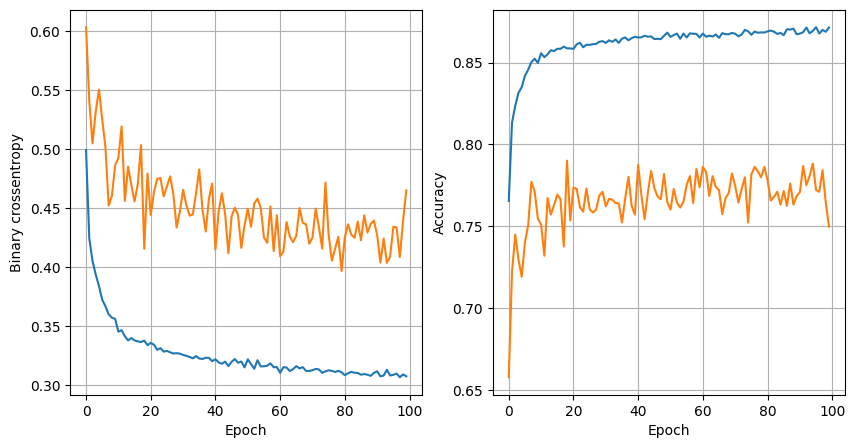

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8755 - loss: 0.2947 
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


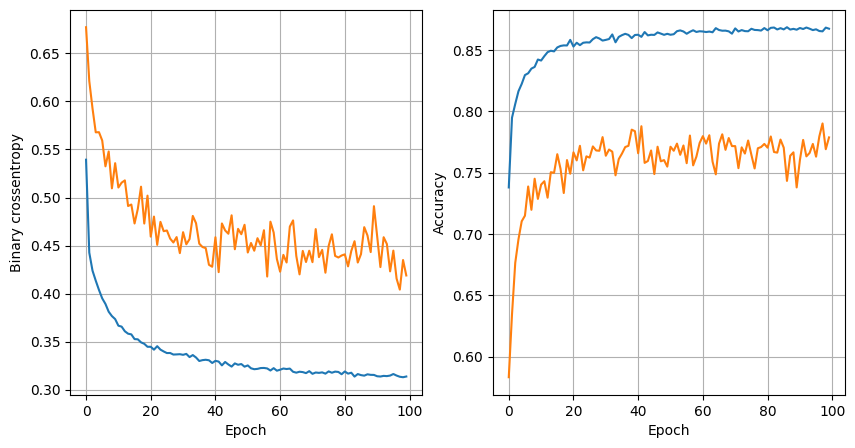

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8644 - loss: 0.3046 
64 nodes, dropout 0, learning rate 0.01, batch size 32


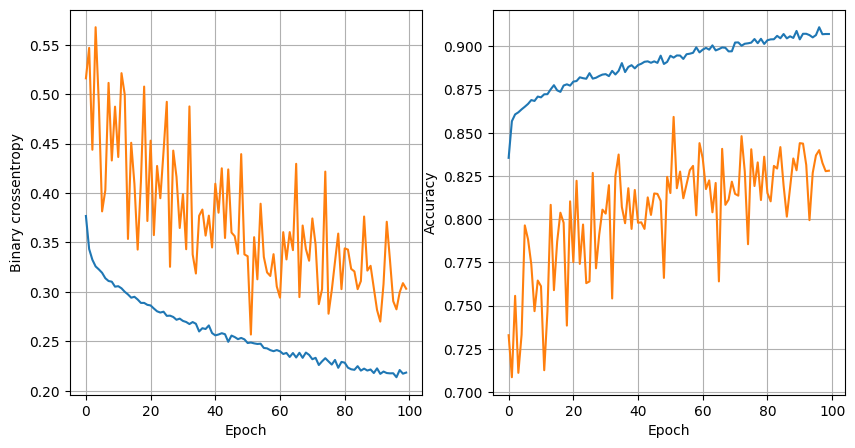

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8672 - loss: 0.3861 
64 nodes, dropout 0, learning rate 0.01, batch size 64


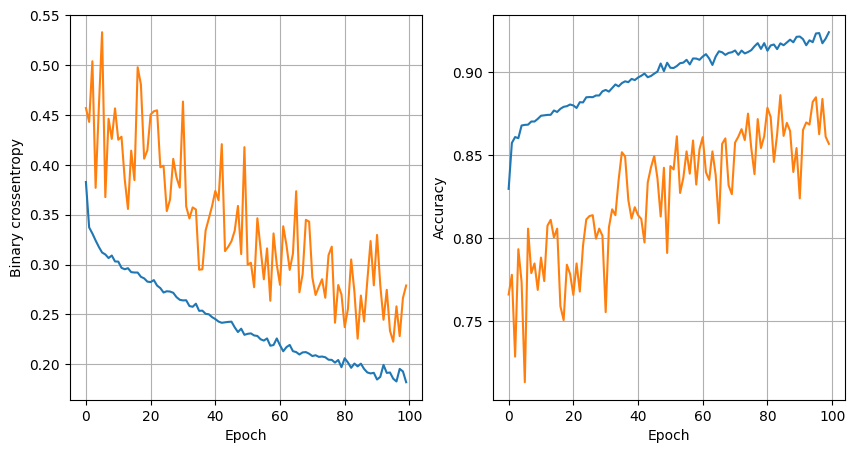

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8575 - loss: 0.5155 
64 nodes, dropout 0, learning rate 0.01, batch size 128


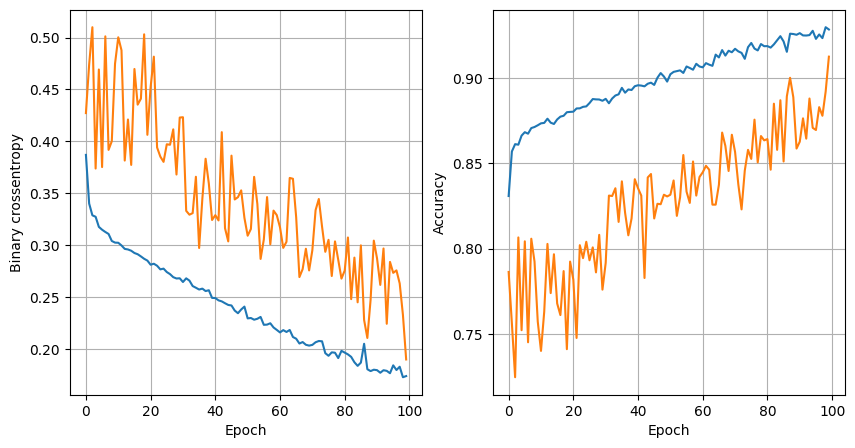

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8597 - loss: 0.5170 
64 nodes, dropout 0, learning rate 0.005, batch size 32


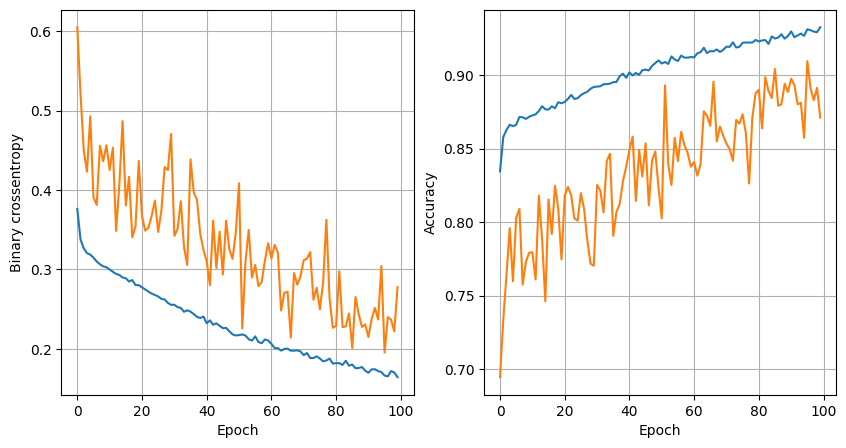

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8656 - loss: 0.5166 
64 nodes, dropout 0, learning rate 0.005, batch size 64


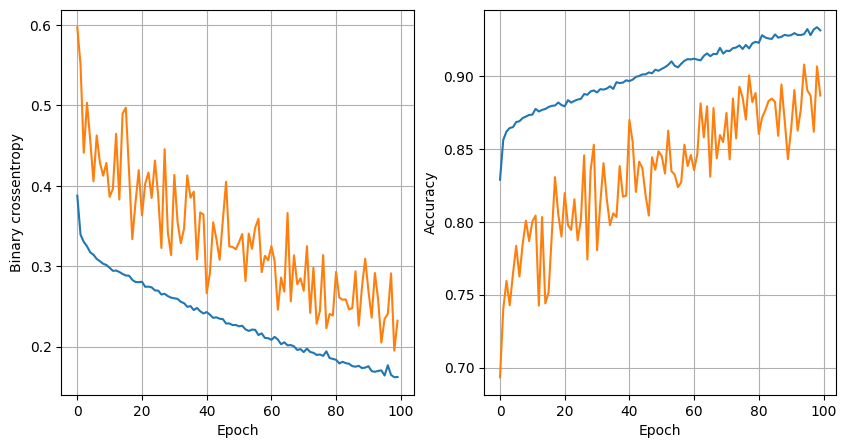

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8621 - loss: 0.4653 
64 nodes, dropout 0, learning rate 0.005, batch size 128


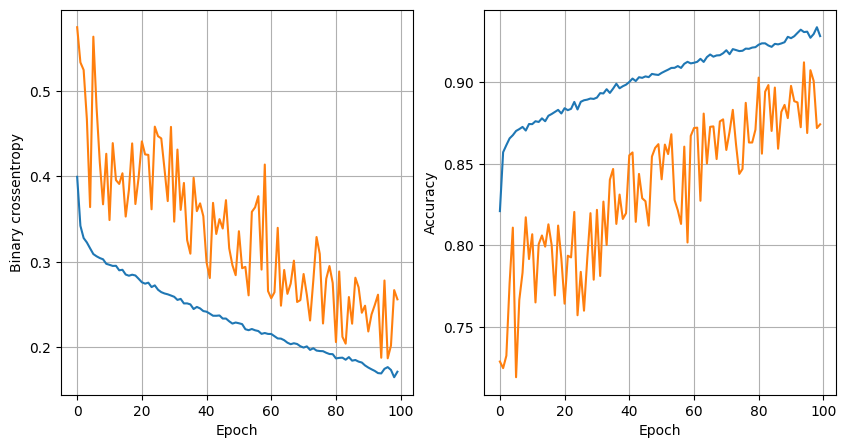

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8579 - loss: 0.4438 
64 nodes, dropout 0, learning rate 0.001, batch size 32


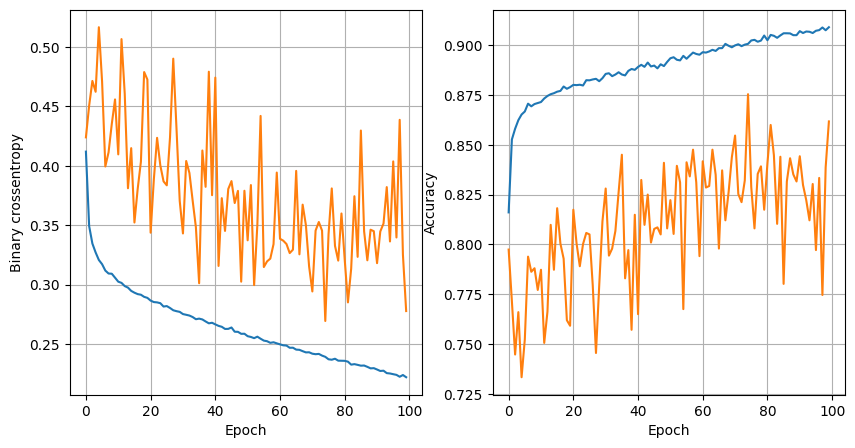

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8726 - loss: 0.3424
64 nodes, dropout 0, learning rate 0.001, batch size 64


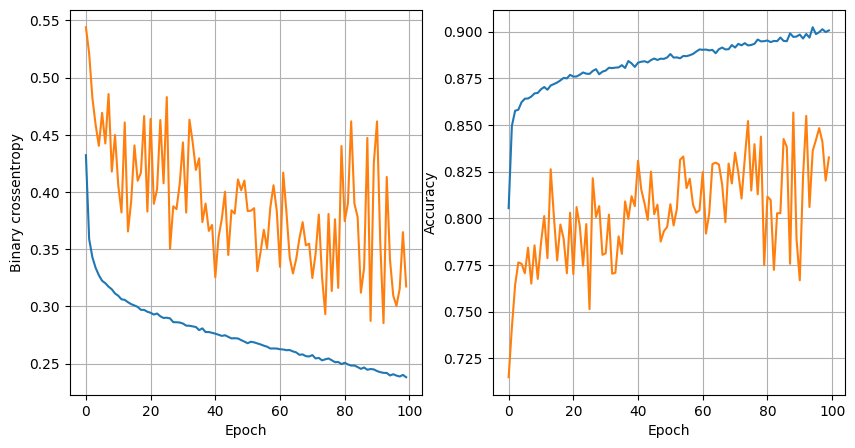

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8707 - loss: 0.3255 
64 nodes, dropout 0, learning rate 0.001, batch size 128


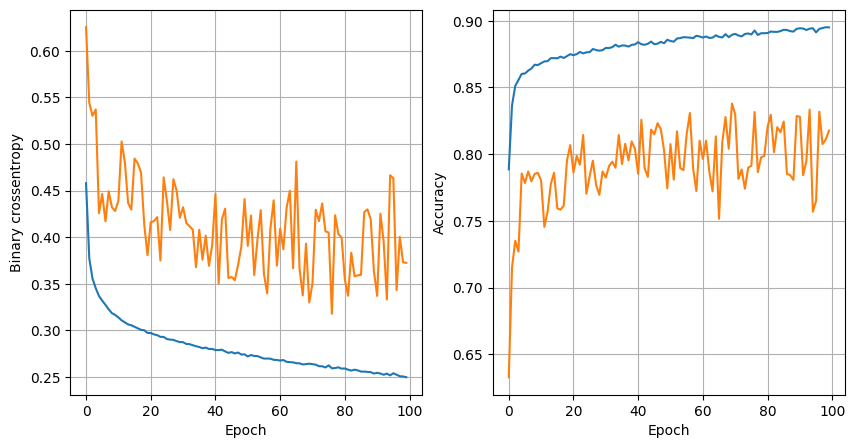

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8699 - loss: 0.3134 
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


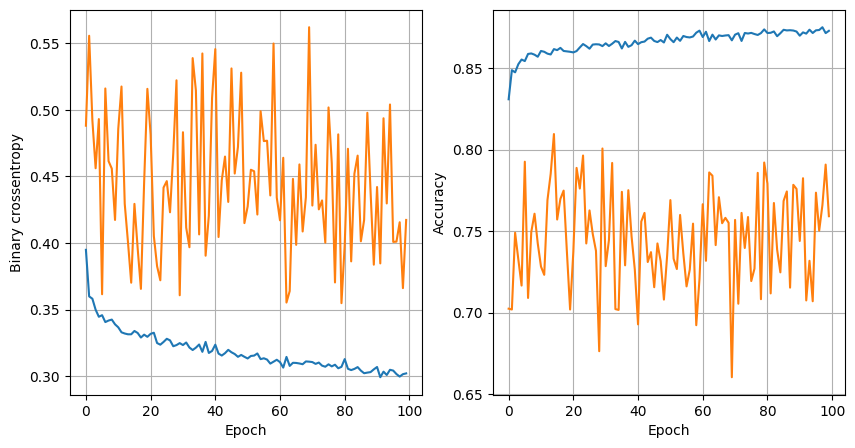

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8782 - loss: 0.3033 
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


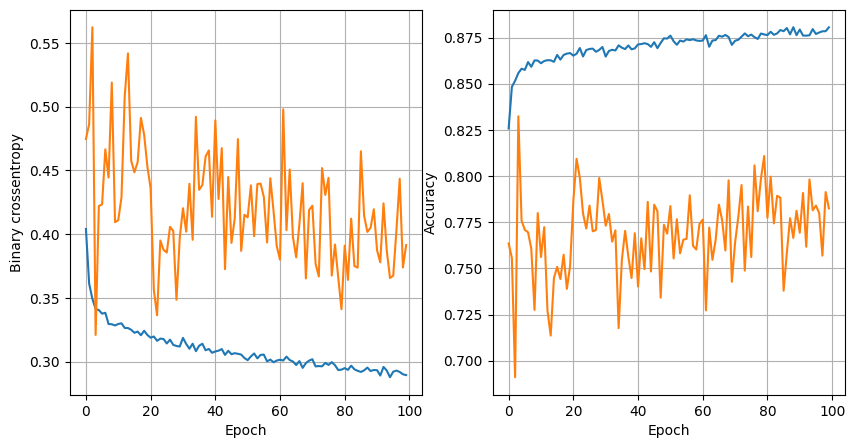

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8749 - loss: 0.3009 
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


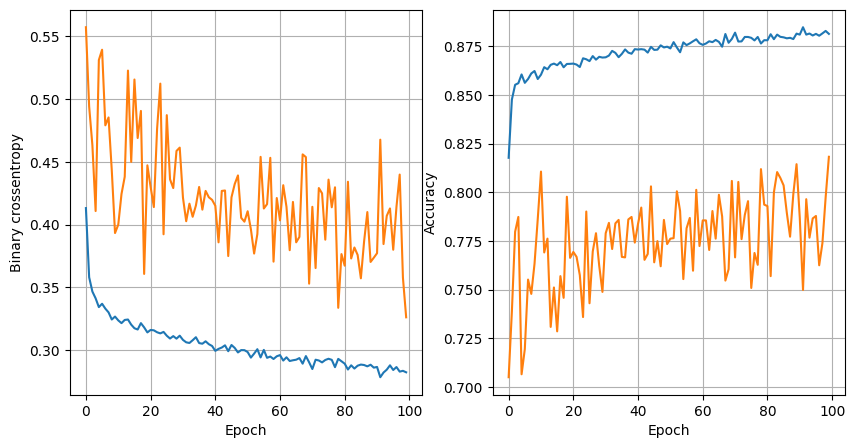

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8777 - loss: 0.2891 
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


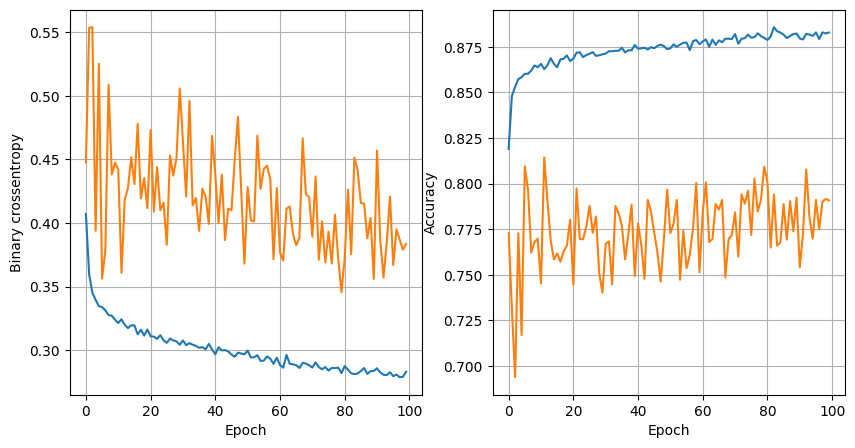

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.3022 
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


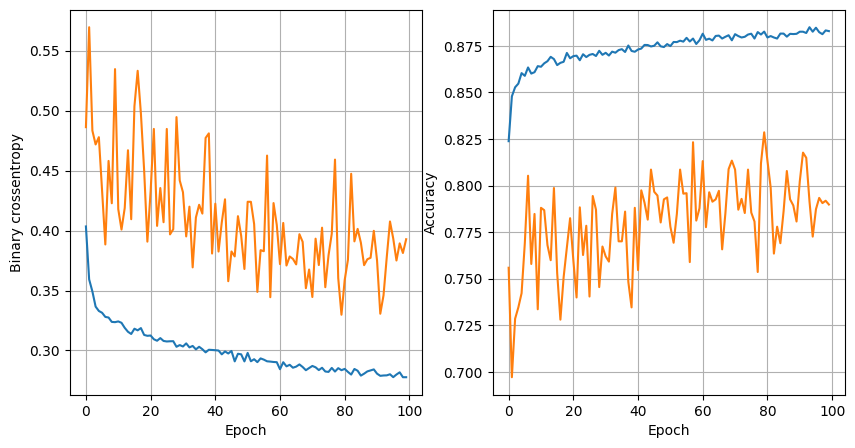

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8891 - loss: 0.2946 
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


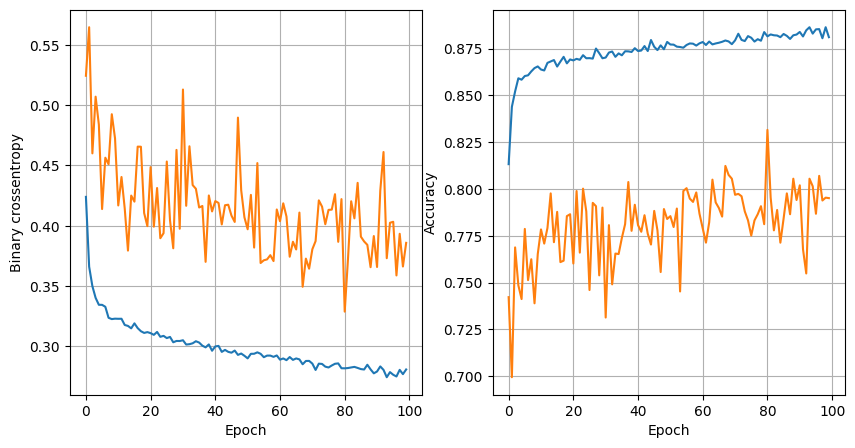

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.2944 
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


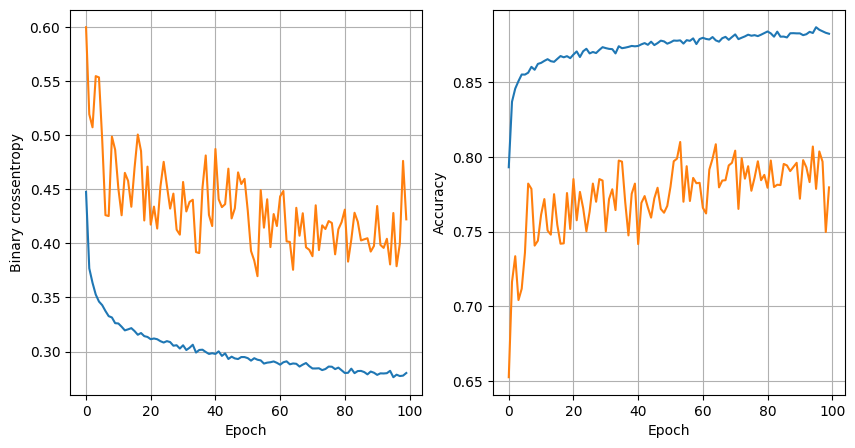

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8764 - loss: 0.2917 
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


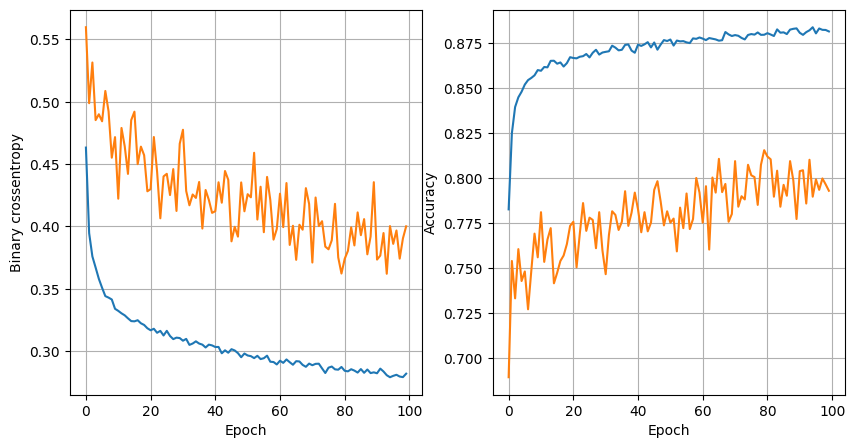

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8801 - loss: 0.2890
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


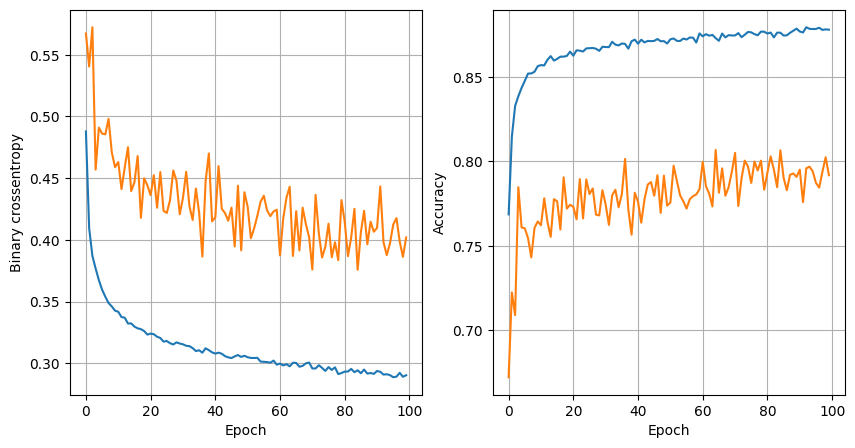

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.2920 


In [32]:
epochs = 100
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
print(history.history.keys())

In [36]:
least_loss_model

<Sequential name=sequential_53, built=True>


In [40]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([1, 1, 1, ..., 1, 1, 1])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       675
           1       0.87      0.95      0.91      1227

    accuracy                           0.88      1902
   macro avg       0.89      0.85      0.87      1902
weighted avg       0.88      0.88      0.88      1902

